In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('dataset/schizo_symptons.csv')

In [47]:
print("informasi dataset :")
print(df.info())

informasi dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            5000 non-null   object 
 1   Age             5000 non-null   int64  
 2   Gender          5000 non-null   object 
 3   Marital_Status  5000 non-null   object 
 4   Fatigue         4756 non-null   float64
 5   Slowing         4771 non-null   float64
 6   Pain            4758 non-null   float64
 7   Hygiene         5000 non-null   float64
 8   Movement        5000 non-null   float64
 9   Schizophrenia   5000 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 390.8+ KB
None


In [48]:
print("\njumlah data per baris :")
print(df.count(axis=1))
print("\njumlah data per kolom :")
print(df.count(axis=0))


jumlah data per baris :
0       10
1       10
2        9
3       10
4       10
        ..
4995    10
4996    10
4997     9
4998    10
4999    10
Length: 5000, dtype: int64

jumlah data per kolom :
Name              5000
Age               5000
Gender            5000
Marital_Status    5000
Fatigue           4756
Slowing           4771
Pain              4758
Hygiene           5000
Movement          5000
Schizophrenia     5000
dtype: int64


In [49]:
# cek kolom yg mengandung kata diagnosis atau label
possible_targets = [col for col in df.columns 
                    if 'diagnosis' in col.lower() 
                    or 'label' in col.lower() 
                    or 'schizo' in col.lower()] 

# jika kolom mengandung kata diagnosis atau label, maka dijadikan target atau -> masuk dalam list possible_targets
feature_target = possible_targets[0] if possible_targets else None #jika ada maka diambil indeks 0, jika tidak ada maka None

# jika kolom tidak mengandung diagnosis atau label maka masuk ke dalam list feature_variables
feature_variables = [col for col in df.columns 
                     if col != feature_target]

print("\nFitur Target:", feature_target)
print("Fitur Variabel Bebas:", feature_variables)


Fitur Target: Schizophrenia
Fitur Variabel Bebas: ['Name', 'Age', 'Gender', 'Marital_Status', 'Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement']


In [50]:
print("jumlah data null :")
print(df.isnull().sum())

jumlah data null :
Name                0
Age                 0
Gender              0
Marital_Status      0
Fatigue           244
Slowing           229
Pain              242
Hygiene             0
Movement            0
Schizophrenia       0
dtype: int64


In [52]:
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)
print(df.isnull().sum())

Name              0
Age               0
Gender            0
Marital_Status    0
Fatigue           0
Slowing           0
Pain              0
Hygiene           0
Movement          0
Schizophrenia     0
dtype: int64


In [53]:
# cek data duplikat
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 0


In [54]:
from sklearn.preprocessing import LabelEncoder
# ubah kolom categorical menjadi numerik

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0

le_marital = LabelEncoder()
df['Marital_Status'] = le_marital.fit_transform(df['Marital_Status'])

le_target = LabelEncoder()
df['Schizophrenia'] = le_target.fit_transform(df['Schizophrenia'])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            5000 non-null   object 
 1   Age             5000 non-null   int64  
 2   Gender          5000 non-null   int32  
 3   Marital_Status  5000 non-null   int32  
 4   Fatigue         5000 non-null   float64
 5   Slowing         5000 non-null   float64
 6   Pain            5000 non-null   float64
 7   Hygiene         5000 non-null   float64
 8   Movement        5000 non-null   float64
 9   Schizophrenia   5000 non-null   int32  
dtypes: float64(5), int32(3), int64(1), object(1)
memory usage: 332.2+ KB
None


In [55]:
# Ambil hanya kolom numerik dari DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Hitung kuartil dan IQR
q1 = np.quantile(numeric_df, 0.25, axis=0)
q2 = np.quantile(numeric_df, 0.50, axis=0)
q3 = np.quantile(numeric_df, 0.75, axis=0)
iqr = q3 - q1

# Hitung batas atas dan bawah
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Hitung jumlah outlier
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)
print("Jumlah nilai outlier per kolom:")
print(outliers.sum())


Jumlah nilai outlier per kolom:
Age                 0
Gender              0
Marital_Status      0
Fatigue             0
Slowing             0
Pain                0
Hygiene             0
Movement            0
Schizophrenia     925
dtype: int64


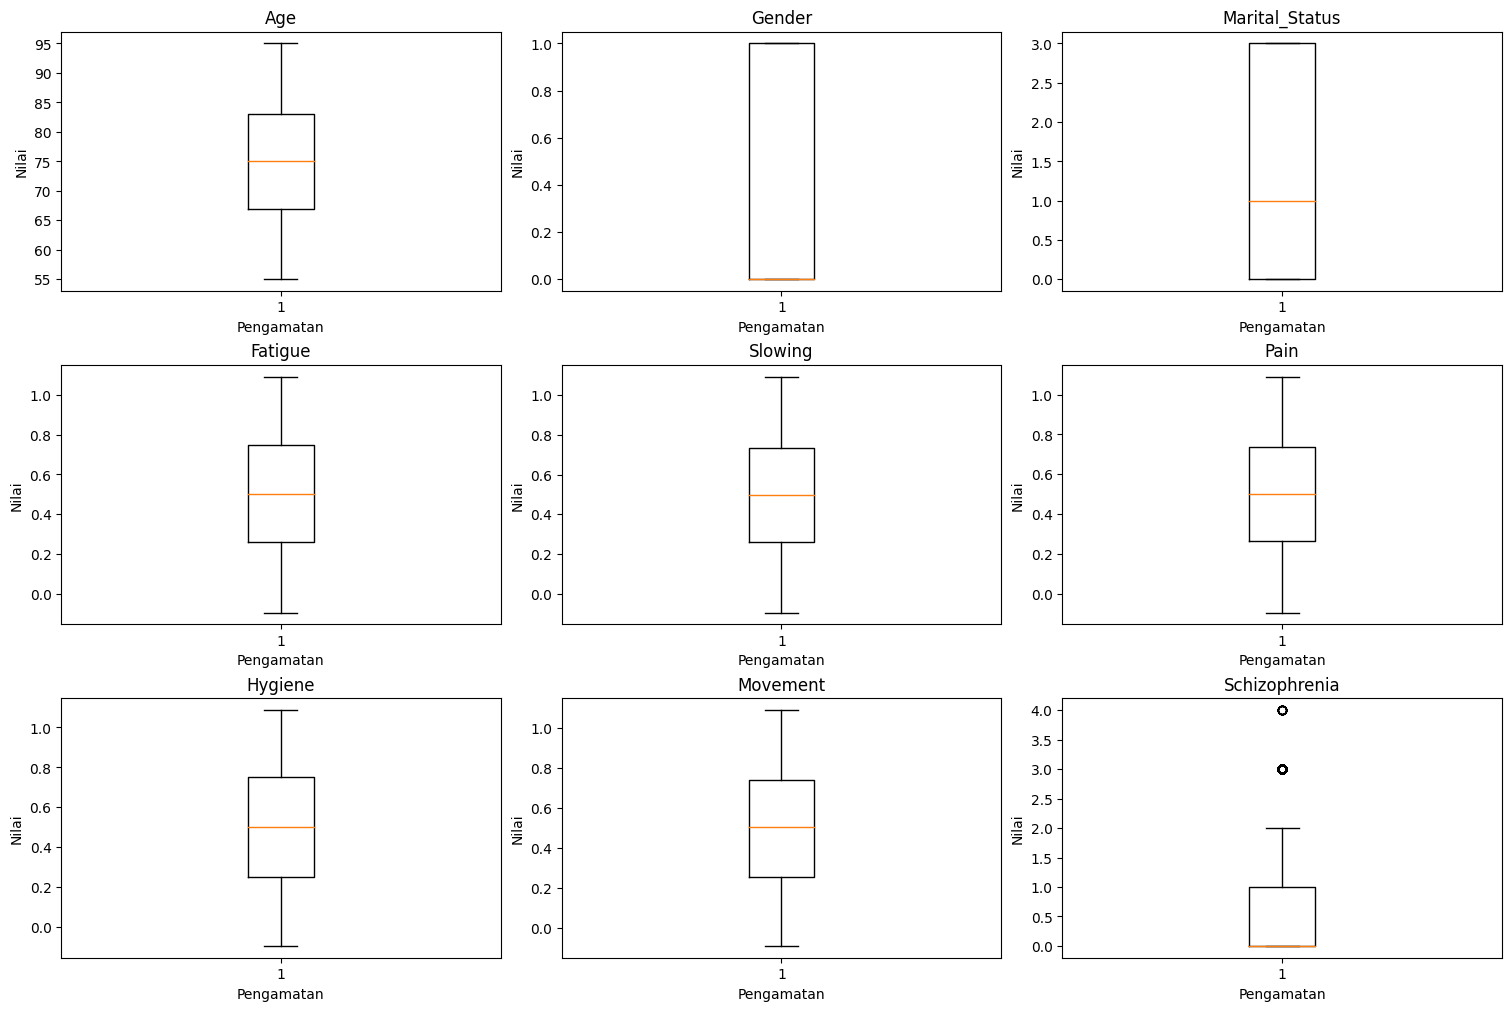

In [60]:
# Daftar kolom yang ingin ditampilkan dalam subplot
columns = ['Age', 'Gender', 'Marital_Status', 'Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement', 'Schizophrenia']

# Buat subplot dinamis sesuai jumlah kolom
fig, axes = plt.subplots(3, 3, figsize=(15, 10), layout='constrained')
axes = axes.flatten() 

# Jika hanya satu kolom, axes bukan iterable, jadi buat jadi list
if len(columns) == 1:
    axes = [axes]

# Loop untuk setiap kolom dan subplot
for i, col in enumerate(columns):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)
    axes[i].set_xlabel('Pengamatan')
    axes[i].set_ylabel('Nilai')

plt.show()

In [64]:
print(df.to_string())

                           Name  Age  Gender  Marital_Status   Fatigue   Slowing      Pain   Hygiene  Movement  Schizophrenia
0                Leslie Goodwin   68       0               2  0.698075  0.123064  0.375303  0.234639  0.251869              0
1            Dr. Troy Castaneda   88       1               1  0.049245 -0.042080  0.432807  0.501238  0.379948              3
2                 Chelsey Allen   67       0               1  0.651995  0.187117  0.499612  0.301942  0.302588              0
3         Dr. Devin Skinner DVM   95       0               3  0.036324  0.580808  0.005356  0.306968  0.813618              3
4                  Megan Mendez   81       0               3  0.926727  0.484202  0.702405  0.736054  0.579448              1
5             Zachary Smith DVM   77       1               1  0.145541  0.737656  0.369630  0.206471  0.890684              0
6               Aimee Carpenter   62       1               3  0.482457  0.204313 -0.037966 -0.020695  0.567918        

In [ ]:
no_outliers = []
mean = np.mean(df["Disease_Duration"])
for x in df["Disease_Duration"]:
    if x not in outliers:
        no_outliers.append(x)
    else:
        no_outliers.append(mean)

print("jumlah data tanpa outlier :")
print(len(no_outliers))

jumlah data tanpa outlier :
10000
